In [546]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Grouper
from pandas import DataFrame
from numpy import log
from numpy import sqrt

import warnings
warnings.filterwarnings("ignore")


In [547]:
df = pd.read_csv("Gold_data.csv")
df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [548]:
#df.set_index('date',inplace=True) ## making the month column as index

In [549]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [550]:
df.dtypes

date      object
price    float64
dtype: object

In [551]:
df.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [552]:
df.isnull().sum()

date     0
price    0
dtype: int64

In [553]:
df[df.duplicated()].shape

(0, 2)

In [554]:
df[df.duplicated()]

,date,price


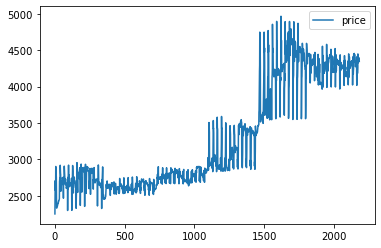

In [555]:
plt.rc('axes', labelsize=18)
df.plot()
plt.show()

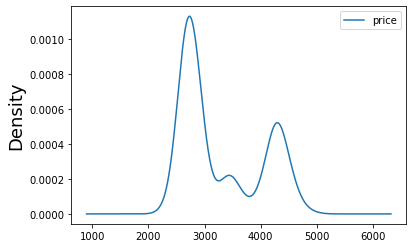

In [556]:
# create a density plot
df.plot(kind='kde')
plt.show()

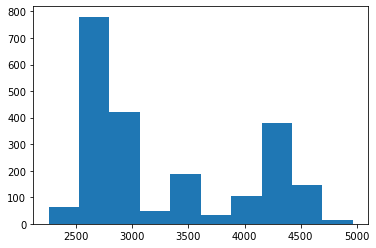

In [557]:
plt.hist(df["price"])
plt.show()

In [558]:
# newly added start:

In [559]:
df.dtypes

date      object
price    float64
dtype: object

In [560]:
# converting date from object to date
df["date"]=pd.to_datetime(df['date'])
df.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [561]:
# fetching year wise data:
gold=df

In [562]:
gold.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [563]:
gold["year"]=df["date"].dt.year
gold.head(2)

,date,price,year
0,2016-01-01,2252.6,2016
1,2016-01-02,2454.5,2016


In [564]:
year_2016=gold[gold["year"]==2016]
year_2017=gold[gold["year"]==2017]
year_2018=gold[gold["year"]==2018]
year_2019=gold[gold["year"]==2019]
year_2020=gold[gold["year"]==2020]
year_2021=gold[gold["year"]==2021]

year_2016.head(5),year_2016.tail(5)

(        date    price  year
 0 2016-01-01  2252.60  2016
 1 2016-01-02  2454.50  2016
 2 2016-01-03  2708.10  2016
 3 2016-01-04  2577.80  2016
 4 2016-01-05  2597.75  2016,
           date        price  year
 361 2016-12-27  2469.300000  2016
 362 2016-12-28  2484.300000  2016
 363 2016-12-29  2498.100000  2016
 364 2016-12-30  2497.800000  2016
 365 2016-12-31  2534.033333  2016)

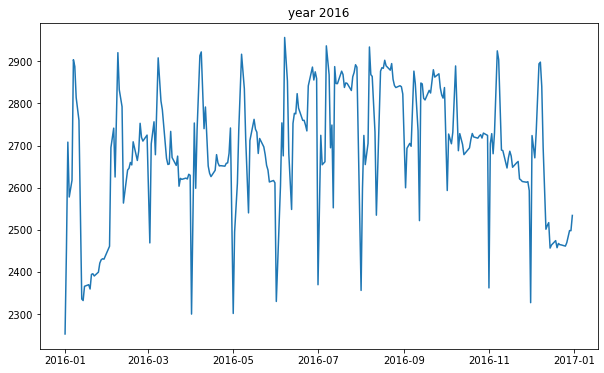

In [565]:
# plotting each year:
plt.figure(figsize=(10,6))
plt.plot(year_2016["date"],year_2016["price"])
plt.title("year 2016")
plt.show()


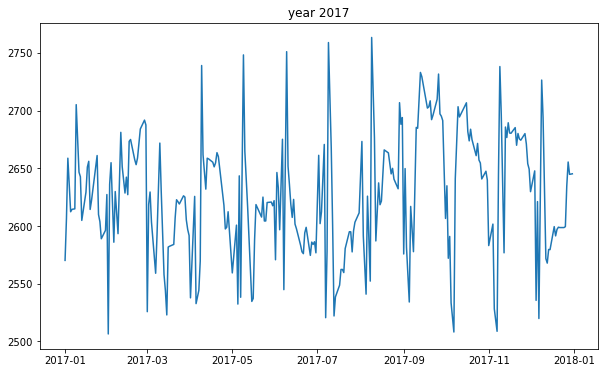

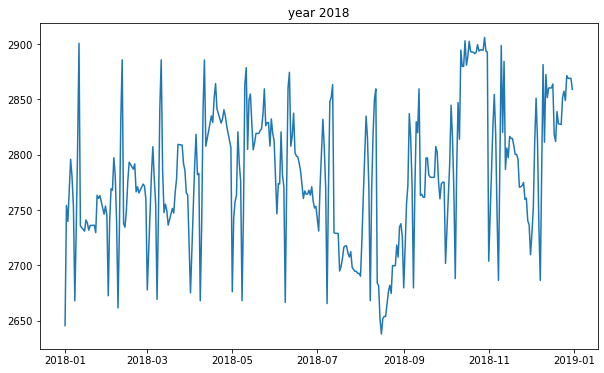

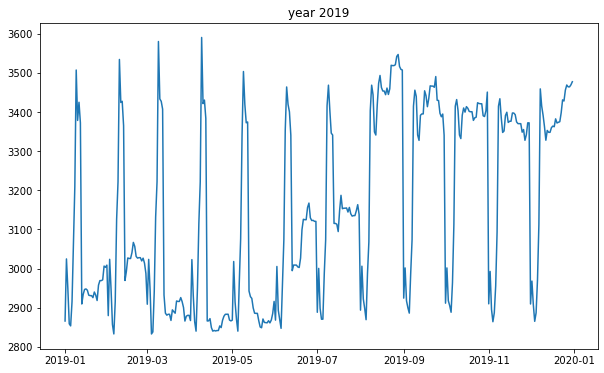

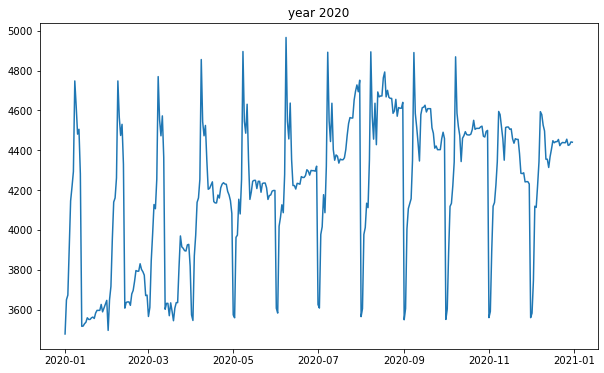

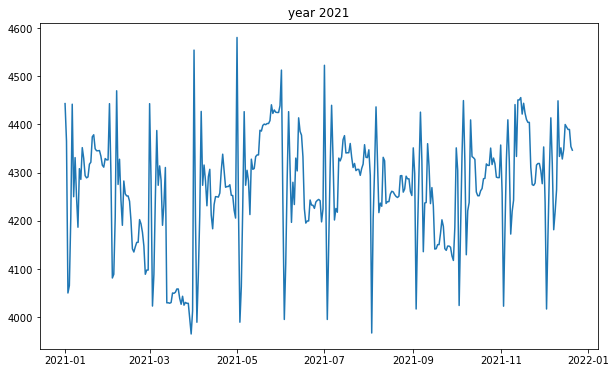

In [566]:
plt.figure(figsize=(10,6))
plt.plot(year_2017["date"],year_2017["price"])
plt.title("year 2017")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(year_2018["date"],year_2018["price"])
plt.title("year 2018")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(year_2019["date"],year_2019["price"])
plt.title("year 2019")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(year_2020["date"],year_2020["price"])
plt.title("year 2020")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(year_2021["date"],year_2021["price"])
plt.title("year 2021")
plt.show()

In [567]:
# fetching months:
gold["month"]=gold["date"].dt.month
gold.head(35)

,date,price,year,month
0,2016-01-01,2252.600000,2016,1
1,2016-01-02,2454.500000,2016,1
2,2016-01-03,2708.100000,2016,1
3,2016-01-04,2577.800000,2016,1
4,2016-01-05,2597.750000,2016,1
5,2016-01-06,2617.700000,2016,1
6,2016-01-07,2903.800000,2016,1
7,2016-01-08,2887.800000,2016,1
8,2016-01-09,2813.800000,2016,1
9,2016-01-10,2786.800000,2016,1


In [568]:
gold

,date,price,year,month
0,2016-01-01,2252.60,2016,1
1,2016-01-02,2454.50,2016,1
2,2016-01-03,2708.10,2016,1
3,2016-01-04,2577.80,2016,1
4,2016-01-05,2597.75,2016,1
...,...,...,...,...
2177,2021-12-17,4394.40,2021,12
2178,2021-12-18,4389.50,2021,12
2179,2021-12-19,4389.50,2021,12
2180,2021-12-20,4354.10,2021,12


In [569]:
year_2016=gold[gold["year"]==2016]
year_2017=gold[gold["year"]==2017]
year_2018=gold[gold["year"]==2018]
year_2019=gold[gold["year"]==2019]
year_2020=gold[gold["year"]==2020]
year_2021=gold[gold["year"]==2021]

year_2016.head(5),year_2016.tail(5)

(        date    price  year  month
 0 2016-01-01  2252.60  2016      1
 1 2016-01-02  2454.50  2016      1
 2 2016-01-03  2708.10  2016      1
 3 2016-01-04  2577.80  2016      1
 4 2016-01-05  2597.75  2016      1,
           date        price  year  month
 361 2016-12-27  2469.300000  2016     12
 362 2016-12-28  2484.300000  2016     12
 363 2016-12-29  2498.100000  2016     12
 364 2016-12-30  2497.800000  2016     12
 365 2016-12-31  2534.033333  2016     12)

In [570]:
year_2016

,date,price,year,month
0,2016-01-01,2252.600000,2016,1
1,2016-01-02,2454.500000,2016,1
2,2016-01-03,2708.100000,2016,1
3,2016-01-04,2577.800000,2016,1
4,2016-01-05,2597.750000,2016,1
...,...,...,...,...
361,2016-12-27,2469.300000,2016,12
362,2016-12-28,2484.300000,2016,12
363,2016-12-29,2498.100000,2016,12
364,2016-12-30,2497.800000,2016,12


In [571]:
# group by price based on month:
# 2016
y_2016=year_2016.groupby(["month"]).agg({"price":np.mean})
y_2016


,price
month,
1,2495.832258
2,2688.703448
3,2682.854839
4,2677.790000
5,2677.650000
6,2745.596667
7,2779.582258
8,2792.240323
9,2792.705000


In [572]:
y_2016.reset_index(inplace=True)

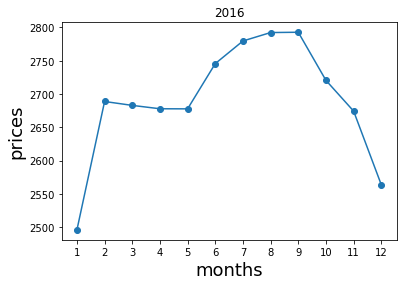

In [573]:
plt.scatter(y_2016["month"], y_2016["price"])
plt.plot(y_2016["month"], y_2016["price"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2016")
plt.xticks(y_2016["month"])
plt.show()

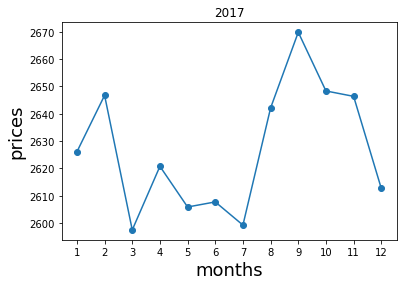

In [574]:
# 2017
y_2017=year_2017.groupby(["month"]).agg({"price":np.mean})
y_2017.reset_index(inplace=True)
plt.scatter(y_2017["month"], y_2017["price"])
plt.plot(y_2017["month"], y_2017["price"])
plt.xticks(y_2017["month"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2017")
plt.show()

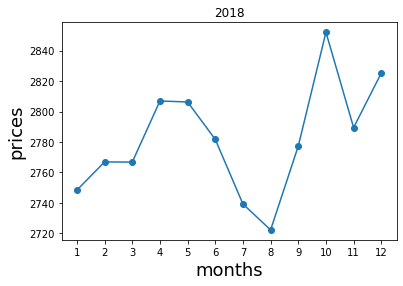

In [575]:
# 2018:
y_2018=year_2018.groupby(["month"]).agg({"price":np.mean})
y_2018.reset_index(inplace=True)
plt.scatter(y_2018["month"], y_2018["price"])
plt.plot(y_2018["month"], y_2018["price"])
plt.xticks(y_2018["month"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2018")
plt.show()

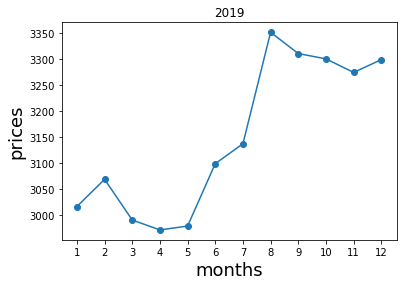

In [576]:
# 2019:
y_2019=year_2019.groupby(["month"]).agg({"price":np.mean})
y_2019.reset_index(inplace=True)
plt.scatter(y_2019["month"], y_2019["price"])
plt.plot(y_2019["month"], y_2019["price"])
plt.xticks(y_2019["month"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2019")
plt.show()

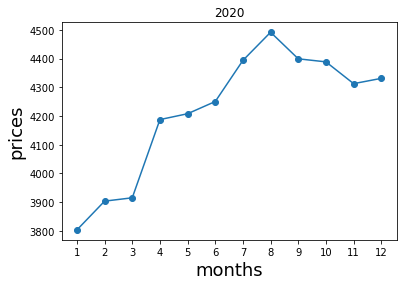

In [577]:
# 2020:
y_2020=year_2020.groupby(["month"]).agg({"price":np.mean})
y_2020.reset_index(inplace=True)
plt.scatter(y_2020["month"], y_2020["price"])
plt.plot(y_2020["month"], y_2020["price"])
plt.xticks(y_2020["month"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2020")
plt.show()

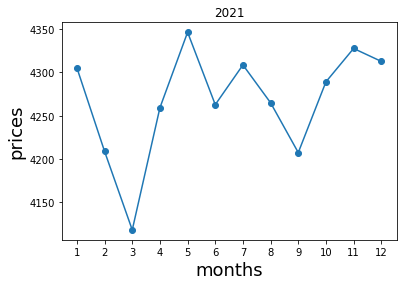

In [578]:
# 2021:y_2021.reset_index(inplace=True)
y_2021=year_2021.groupby(["month"]).agg({"price":np.mean})
y_2021.reset_index(inplace=True)
plt.scatter(y_2021["month"], y_2021["price"])
plt.plot(y_2021["month"], y_2021["price"])
plt.xticks(y_2021["month"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2021")
plt.show()

In [579]:
# newly added end.

In [580]:
df['price_sqrt'] = (df['price'])**(1/2)
df['price_log'] = log(df['price'])

In [581]:
df

,date,price,year,month,price_sqrt,price_log
0,2016-01-01,2252.60,2016,1,47.461563,7.719840
1,2016-01-02,2454.50,2016,1,49.542911,7.805678
2,2016-01-03,2708.10,2016,1,52.039408,7.904003
3,2016-01-04,2577.80,2016,1,50.772040,7.854692
4,2016-01-05,2597.75,2016,1,50.968127,7.862401
...,...,...,...,...,...,...
2177,2021-12-17,4394.40,2021,12,66.290271,8.388086
2178,2021-12-18,4389.50,2021,12,66.253302,8.386971
2179,2021-12-19,4389.50,2021,12,66.253302,8.386971
2180,2021-12-20,4354.10,2021,12,65.985604,8.378873


<AxesSubplot:xlabel='date'>

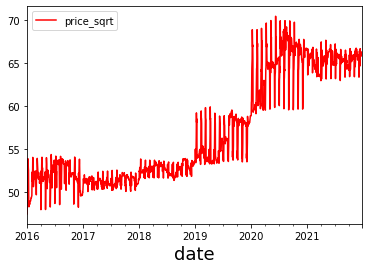

In [582]:
df.plot(x = 'date',y = 'price_sqrt',color = 'red')

<AxesSubplot:xlabel='date', ylabel='price_sqrt'>

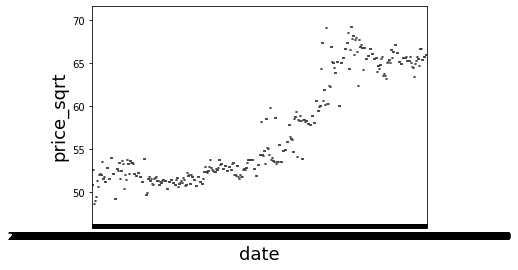

In [583]:
sns.boxplot(df.date,df.price_sqrt)

In [584]:
import numpy as np
DF=df.groupby(pd.DatetimeIndex(df["date"]).year).agg(np.mean)
DF

,price,year,month,price_sqrt,price_log
date,,,,,
2016,2690.614162,2016.0,6.513661,51.851549,7.896004
2017,2626.676484,2017.0,6.526027,51.248738,7.873289
2018,2781.938082,2018.0,6.526027,52.740980,7.930668
2019,3150.210685,2019.0,6.526027,56.087347,8.052419
2020,4216.378689,2020.0,6.513661,64.872209,8.342907
2021,4266.871549,2021.0,6.371831,65.315450,8.358277


In [585]:
DF.reset_index(inplace=True)

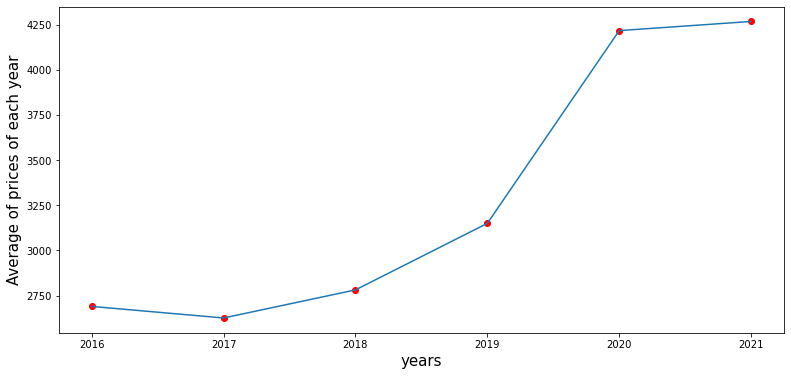

In [586]:
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=15) 
plt.figure(figsize=(13,6))
plt.plot(DF.date,DF.price)
plt.xlabel("years")
plt.ylabel("Average of prices of each year")
plt.scatter(DF.date,DF.price,c='red')

In [587]:
import numpy as np
kf=df.groupby(pd.DatetimeIndex(df["date"]).month).agg(np.mean)
kf

,price,year,month,price_sqrt,price_log
date,,,,,
1,3165.796326,2018.500000,1.0,55.950626,8.038082
2,3214.831471,2018.494118,2.0,56.434510,8.057091
3,3178.425000,2018.500000,3.0,56.114496,8.045743
4,3253.865833,2018.500000,4.0,56.720211,8.065266
5,3270.410753,2018.500000,5.0,56.843587,8.068920
6,3291.177500,2018.500000,6.0,57.047911,8.076857
7,3326.265054,2018.500000,7.0,57.316817,8.085108
8,3377.567473,2018.500000,8.0,57.756848,8.100308
9,3359.573889,2018.500000,9.0,57.645105,8.097890


In [588]:
kf.reset_index(inplace=True)

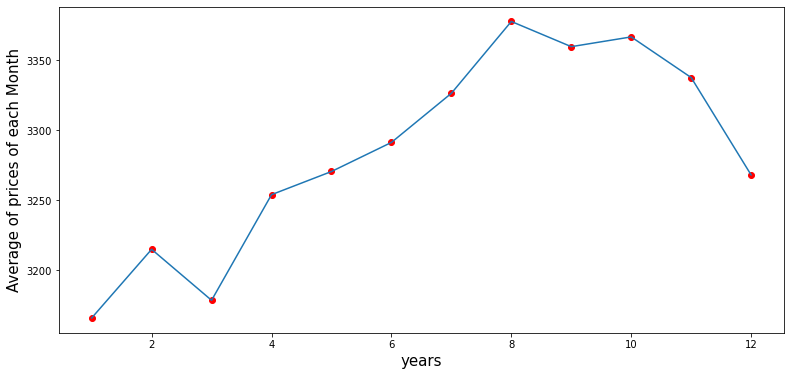

In [589]:
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=15) 
plt.figure(figsize=(13,6))
plt.plot(kf.date,kf.price)
plt.xlabel("years")
plt.ylabel("Average of prices of each Month")
plt.scatter(kf.date,kf.price,c='red')

In [590]:
df["month"] = df.date.dt.strftime("%b") # month extraction
df["year"] = df.date.dt.strftime("%Y") # month extraction

In [591]:
df

,date,price,year,month,price_sqrt,price_log
0,2016-01-01,2252.60,2016,Jan,47.461563,7.719840
1,2016-01-02,2454.50,2016,Jan,49.542911,7.805678
2,2016-01-03,2708.10,2016,Jan,52.039408,7.904003
3,2016-01-04,2577.80,2016,Jan,50.772040,7.854692
4,2016-01-05,2597.75,2016,Jan,50.968127,7.862401
...,...,...,...,...,...,...
2177,2021-12-17,4394.40,2021,Dec,66.290271,8.388086
2178,2021-12-18,4389.50,2021,Dec,66.253302,8.386971
2179,2021-12-19,4389.50,2021,Dec,66.253302,8.386971
2180,2021-12-20,4354.10,2021,Dec,65.985604,8.378873


In [592]:
months = pd.get_dummies(df['month']) 
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0,0,1,0,0,0,0,0,0,0,0,0
2178,0,0,1,0,0,0,0,0,0,0,0,0
2179,0,0,1,0,0,0,0,0,0,0,0,0
2180,0,0,1,0,0,0,0,0,0,0,0,0


In [593]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [594]:
Data = pd.concat([df,months],axis=1) 

In [595]:
Data.head()

,date,price,year,month,price_sqrt,price_log,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016-01-01,2252.60,2016,Jan,47.461563,7.719840,1,0,0,0,0,0,0,0,0,0,0,0
1,2016-01-02,2454.50,2016,Jan,49.542911,7.805678,1,0,0,0,0,0,0,0,0,0,0,0
2,2016-01-03,2708.10,2016,Jan,52.039408,7.904003,1,0,0,0,0,0,0,0,0,0,0,0
3,2016-01-04,2577.80,2016,Jan,50.772040,7.854692,1,0,0,0,0,0,0,0,0,0,0,0
4,2016-01-05,2597.75,2016,Jan,50.968127,7.862401,1,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='month', ylabel='year'>

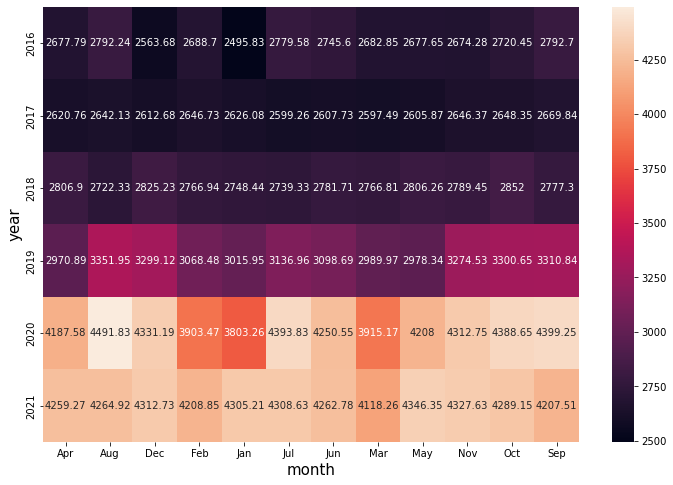

In [596]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Data,values="price",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot:xlabel='year', ylabel='price'>

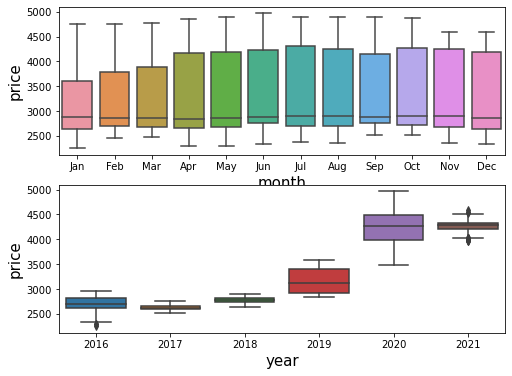

In [597]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="price",data= Data)
plt.subplot(212)
sns.boxplot(x="year",y="price",data=Data)

<AxesSubplot:xlabel='year', ylabel='price'>

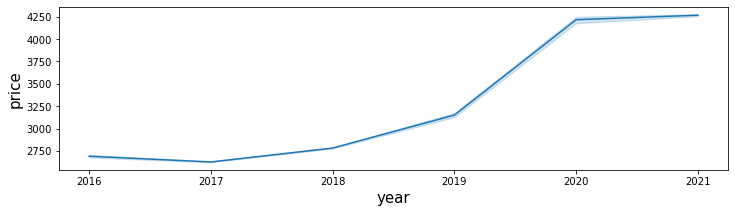

In [598]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="price",data=Data)

# model building:

## 1. XG_Boosting:

In [599]:
Data.head(5)

,date,price,year,month,price_sqrt,price_log,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016-01-01,2252.60,2016,Jan,47.461563,7.719840,1,0,0,0,0,0,0,0,0,0,0,0
1,2016-01-02,2454.50,2016,Jan,49.542911,7.805678,1,0,0,0,0,0,0,0,0,0,0,0
2,2016-01-03,2708.10,2016,Jan,52.039408,7.904003,1,0,0,0,0,0,0,0,0,0,0,0
3,2016-01-04,2577.80,2016,Jan,50.772040,7.854692,1,0,0,0,0,0,0,0,0,0,0,0
4,2016-01-05,2597.75,2016,Jan,50.968127,7.862401,1,0,0,0,0,0,0,0,0,0,0,0


In [600]:
data1=Data[["date","year","month","price","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]].copy()
data1.head(1)

,date,year,month,price,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016-01-01,2016,Jan,2252.6,1,0,0,0,0,0,0,0,0,0,0,0


In [601]:
data1.dtypes

date     datetime64[ns]
year             object
month            object
price           float64
Jan               uint8
Feb               uint8
Mar               uint8
Apr               uint8
May               uint8
Jun               uint8
Jul               uint8
Aug               uint8
Sep               uint8
Oct               uint8
Nov               uint8
Dec               uint8
dtype: object

# splitting data:

In [602]:
train=data1.head(2000)
test=data1.tail(182)

In [603]:
train.shape,test.shape

((2000, 16), (182, 16))

In [604]:
#!pip install xgboost


In [605]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as mse

In [606]:
x_train=train.drop(["price","month"],axis=1)
x_train.head(1)

,date,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016-01-01,2016,1,0,0,0,0,0,0,0,0,0,0,0


In [607]:
x_train.drop(["date"],axis=1,inplace=True)
x_train.head(1)

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016,1,0,0,0,0,0,0,0,0,0,0,0


In [608]:
x_train.dtypes

year    object
Jan      uint8
Feb      uint8
Mar      uint8
Apr      uint8
May      uint8
Jun      uint8
Jul      uint8
Aug      uint8
Sep      uint8
Oct      uint8
Nov      uint8
Dec      uint8
dtype: object

In [609]:
x_train["year"]=x_train["year"].astype(int)
x_train.dtypes

year    int32
Jan     uint8
Feb     uint8
Mar     uint8
Apr     uint8
May     uint8
Jun     uint8
Jul     uint8
Aug     uint8
Sep     uint8
Oct     uint8
Nov     uint8
Dec     uint8
dtype: object

In [610]:
y_train=train["price"]
y_train.dtypes

dtype('float64')

In [611]:
model=XGBRegressor(n_estimators=100,max_depth=3,eta=0.1,subsample=0.8,colsample_bytree=0.8,random_state=9)

# note:
# # n_estimators: The number of trees in the ensemble, often increased until no further improvements are seen.
# max_depth: The maximum depth of each tree, often values are between 1 and 10.
# eta: The learning rate used to weight each model, often set to small values such as 0.3, 0.1, 0.01, or smaller.
# subsample: The number of samples (rows) used in each tree, set to a value between 0 and 1, often 1.0 to use all samples.
#colsample_bytree: Number of features (columns) used in each tree, set to a value between 0 and 1, often 1.0 to use all features

# link:  https://machinelearningmastery.com/xgboost-for-regression/

In [612]:
print(x_train.head(5))
print(y_train.head(5))

   year  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
0  2016    1    0    0    0    0    0    0    0    0    0    0    0
1  2016    1    0    0    0    0    0    0    0    0    0    0    0
2  2016    1    0    0    0    0    0    0    0    0    0    0    0
3  2016    1    0    0    0    0    0    0    0    0    0    0    0
4  2016    1    0    0    0    0    0    0    0    0    0    0    0
0    2252.60
1    2454.50
2    2708.10
3    2577.80
4    2597.75
Name: price, dtype: float64


In [613]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=9, reg_alpha=0, ...)

In [614]:
train_p=model.predict(x_train)

In [615]:
train_rmse=sqrt(mse(y_train,train_p)).round(3)
train_rmse

165.859

In [616]:
# predicting:

In [617]:
test.head(5)

,date,year,month,price,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,2021-06-23,2021,Jun,4232.3,0,0,0,0,0,1,0,0,0,0,0,0
2001,2021-06-24,2021,Jun,4225.8,0,0,0,0,0,1,0,0,0,0,0,0
2002,2021-06-25,2021,Jun,4238.9,0,0,0,0,0,1,0,0,0,0,0,0
2003,2021-06-26,2021,Jun,4242.3,0,0,0,0,0,1,0,0,0,0,0,0
2004,2021-06-27,2021,Jun,4244.4,0,0,0,0,0,1,0,0,0,0,0,0


In [618]:
x_test=test.drop(["price","month"],axis=1)
x_test.head(2)

,date,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,2021-06-23,2021,0,0,0,0,0,1,0,0,0,0,0,0
2001,2021-06-24,2021,0,0,0,0,0,1,0,0,0,0,0,0


In [619]:
x_test.drop(["date"],axis=1,inplace=True)

In [620]:
x_test.dtypes

year    object
Jan      uint8
Feb      uint8
Mar      uint8
Apr      uint8
May      uint8
Jun      uint8
Jul      uint8
Aug      uint8
Sep      uint8
Oct      uint8
Nov      uint8
Dec      uint8
dtype: object

In [621]:
x_test["year"]=x_test["year"].astype(int)
x_test.dtypes

year    int32
Jan     uint8
Feb     uint8
Mar     uint8
Apr     uint8
May     uint8
Jun     uint8
Jul     uint8
Aug     uint8
Sep     uint8
Oct     uint8
Nov     uint8
Dec     uint8
dtype: object

In [622]:
x_test.head(5)

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,2021,0,0,0,0,0,1,0,0,0,0,0,0
2001,2021,0,0,0,0,0,1,0,0,0,0,0,0
2002,2021,0,0,0,0,0,1,0,0,0,0,0,0
2003,2021,0,0,0,0,0,1,0,0,0,0,0,0
2004,2021,0,0,0,0,0,1,0,0,0,0,0,0


In [623]:
predicted_values=model.predict(x_test)
#predicted_values

In [624]:
forecast=pd.DataFrame({"prediction":predicted_values})
forecast.head(5)

,prediction
0,4295.550293
1,4295.550293
2,4295.550293
3,4295.550293
4,4295.550293


In [625]:
# set indexing starting from 2000
forecast = forecast.set_index(x_test.index)
forecast.head(5)

,prediction
2000,4295.550293
2001,4295.550293
2002,4295.550293
2003,4295.550293
2004,4295.550293


In [626]:
y_test=test["price"]

In [627]:
y_test=pd.DataFrame({'actual price':y_test})

In [628]:
y_test.head(5)

,actual price
2000,4232.3
2001,4225.8
2002,4238.9
2003,4242.3
2004,4244.4


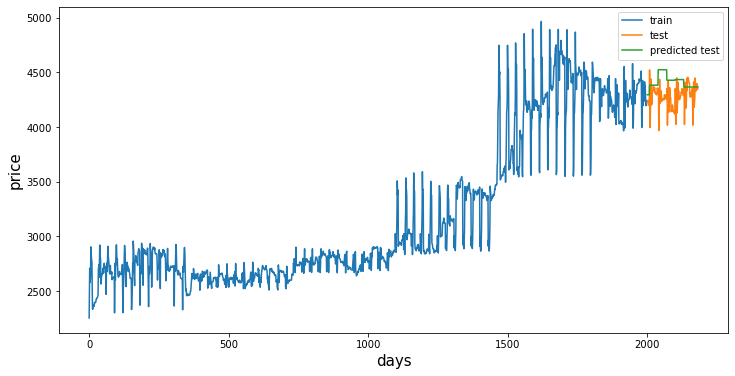

In [629]:
train["price"].plot(legend=True, label="train",figsize=(12,6))
test["price"].plot(legend=True, label="test")
forecast["prediction"].plot(legend=True,label="predicted test")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

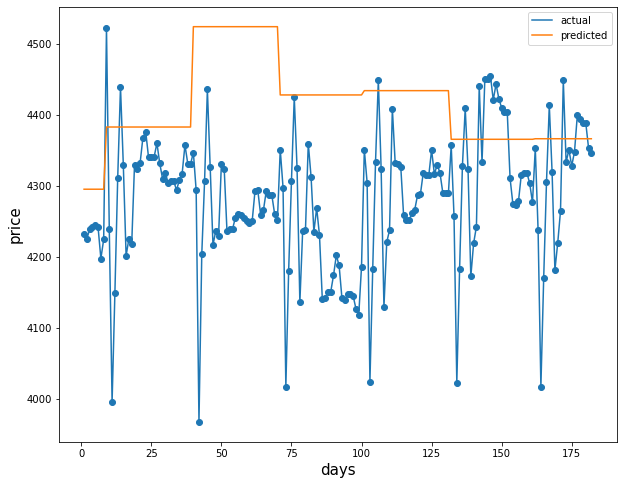

In [630]:
plt.figure(figsize=(10,8))
plt.scatter(np.arange(1,len(y_test)+1),y_test)
plt.plot(np.arange(1,len(y_test)+1),y_test)

#plt.scatter(np.arange(1,len(y_test)+1),forecast)
plt.plot(np.arange(1,len(y_test)+1),forecast)
plt.xlabel("days")
plt.ylabel("price")
plt.legend(["actual","predicted"])

In [631]:
y_test

,actual price
2000,4232.3
2001,4225.8
2002,4238.9
2003,4242.3
2004,4244.4
...,...
2177,4394.4
2178,4389.5
2179,4389.5
2180,4354.1


In [632]:
forecast

,prediction
2000,4295.550293
2001,4295.550293
2002,4295.550293
2003,4295.550293
2004,4295.550293
...,...
2177,4366.715820
2178,4366.715820
2179,4366.715820
2180,4366.715820


In [633]:
mse(y_test,forecast)

32017.225368649142

In [634]:
test_rmse=sqrt(mse(y_test,forecast)).round(3)
test_rmse

178.934

In [635]:
a=pd.DataFrame({"XG_boost":["training","testing"], "rmse":[train_rmse,test_rmse]})
a

,XG_boost,rmse
0,training,165.859
1,testing,178.934


## tuning of hyperparameters:

In [636]:
sample=np.arange(0.1,1,0.5/10)
sample

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [637]:
# max features for each tree:
sample=np.arange(0.1,1,0.5/10)
Train=[]
Test=[]
for i in sample:
    model=XGBRegressor(n_estimators=100,max_depth=3,eta=0.1,subsample=0.8, colsample_bytree=i,random_state=9)
    model.fit(x_train,y_train)
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    Train.append(sqrt(mse(y_train,y_train_pred)))
    Test.append(sqrt(mse(y_test,y_test_pred)))


In [638]:
#Train


In [639]:
#Test

In [640]:
data=pd.DataFrame({"train rmse":Train,"test rmse":Test})
data

,train rmse,test rmse
0,400.716156,613.536309
1,400.716156,613.536309
2,300.553233,408.190385
3,201.814390,146.715710
4,201.814390,146.715710
5,178.703495,108.096063
6,174.056344,125.691323
7,174.056344,125.691323
8,170.699924,144.282467
9,168.631005,158.352449


In [641]:
len(Test)

18

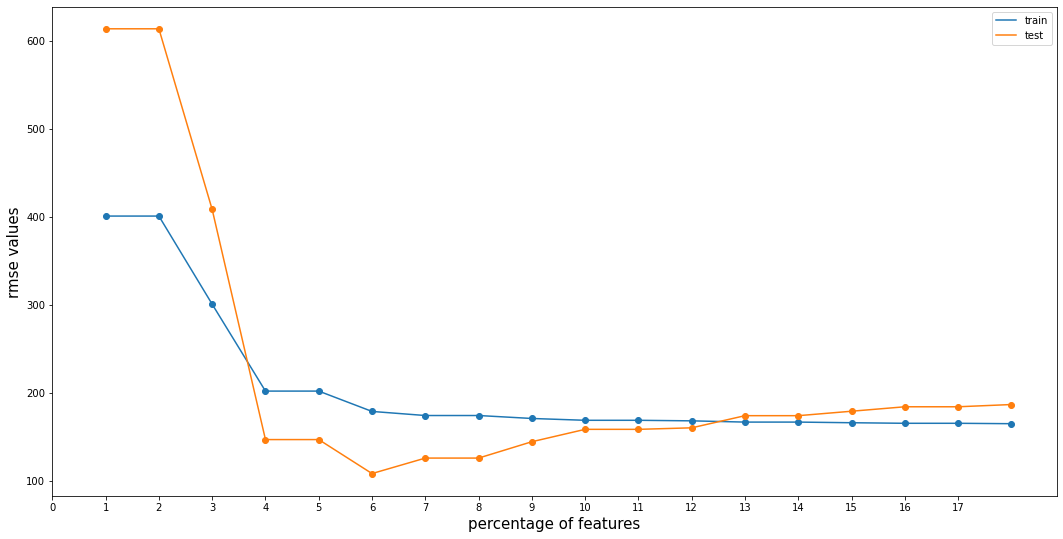

In [642]:
# through visualization:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,9))
plt.scatter(np.arange(1,len(Test)+1),data["train rmse"])
plt.plot(np.arange(1,len(Test)+1),data["train rmse"])

plt.scatter(np.arange(1,len(Test)+1),data["test rmse"])
plt.plot(np.arange(1,len(Test)+1),data["test rmse"])
plt.xlabel("percentage of features")
plt.ylabel("rmse values")
plt.xticks(np.arange(len(sample)))
plt.legend(["train","test"])
plt.show()

# 6

In [643]:
len(sample)

18

In [644]:
sample[5].round(2)
#0.3

0.35

In [645]:
# maximum number of trees:
trees=[10,20,30,40,50,60,70,80,90,100,150,200,250,300,350,400,450,500]
Train=[]
Test=[]
for i in trees:
    model=XGBRegressor(n_estimators=i,max_depth=3,eta=0.1,subsample=0.8, colsample_bytree=0.3,random_state=9)
    model.fit(x_train,y_train)
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    Train.append(sqrt(mse(y_train,y_train_pred)))
    Test.append(sqrt(mse(y_test,y_test_pred)))

In [646]:
Train

[1276.1944969743663,
 613.1979216814686,
 394.11053087635526,
 323.9014342892132,
 299.8284543917284,
 280.93622541106475,
 242.03456035730926,
 232.1073222435836,
 210.99085316901864,
 201.81438953868084,
 181.42250324217937,
 175.4804067115571,
 171.77879424465206,
 170.55240553684487,
 168.97611029318878,
 167.82538845541322,
 166.66864160769646,
 165.78540427497194]

In [647]:
Test

[2102.0526386306055,
 1127.6592810856941,
 683.84902399886,
 498.2123949030631,
 423.04182164121636,
 370.5577125715775,
 268.1413172145783,
 238.36138425838615,
 175.57406295140703,
 146.71571036479637,
 109.57084160844403,
 132.62089637925817,
 160.29538274229245,
 169.048889330127,
 175.92387677148454,
 183.71816646281997,
 187.34706913384082,
 197.53340006738037]

In [648]:
dat1=pd.DataFrame({"train rmse":Train,"test rmse":Test})
dat1

,train rmse,test rmse
0,1276.194497,2102.052639
1,613.197922,1127.659281
2,394.110531,683.849024
3,323.901434,498.212395
4,299.828454,423.041822
5,280.936225,370.557713
6,242.034560,268.141317
7,232.107322,238.361384
8,210.990853,175.574063
9,201.814390,146.715710


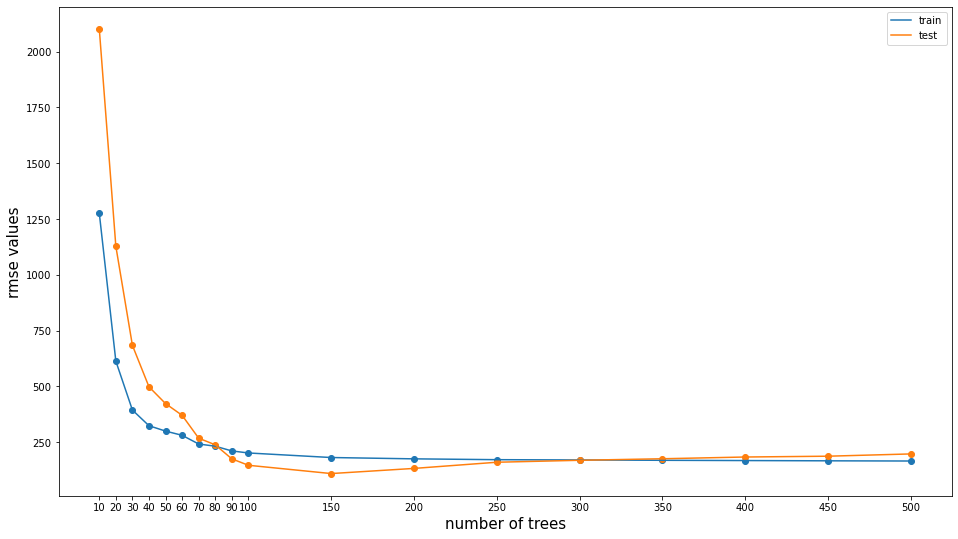

In [649]:
# through visualization:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.scatter(trees,dat1["train rmse"])
plt.plot(trees,dat1["train rmse"])

plt.scatter(trees,dat1["test rmse"])
plt.plot(trees,dat1["test rmse"])
plt.xticks(trees)
plt.xlabel("number of trees")
plt.ylabel("rmse values")
plt.legend(["train","test"])
plt.show()

In [650]:
#150

In [651]:
eta=np.arange(0.1,1,0.9/10)
print(eta)
len(eta)

[0.1  0.19 0.28 0.37 0.46 0.55 0.64 0.73 0.82 0.91]


10

In [652]:
# eta tuning:
eta=np.arange(0.1,1,0.9/10)
Train=[]
Test=[]
for i in eta:
    model=XGBRegressor(n_estimators=150,max_depth=3,eta=i,subsample=0.8, colsample_bytree=0.3,random_state=9)
    model.fit(x_train,y_train)
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    Train.append(sqrt(mse(y_train,y_train_pred)))
    Test.append(sqrt(mse(y_test,y_test_pred)))


In [653]:
data2=pd.DataFrame({"train rmse":Train,"test rmse":Test})
data2

,train rmse,test rmse
0,181.422503,109.570842
1,173.392885,155.785727
2,170.056817,178.686160
3,168.108303,187.723457
4,165.668972,209.721917
5,166.459412,200.370358
6,166.140959,203.808226
7,165.711723,202.257905
8,165.676590,230.563584
9,165.510430,183.190202


In [654]:
len(Test)

10

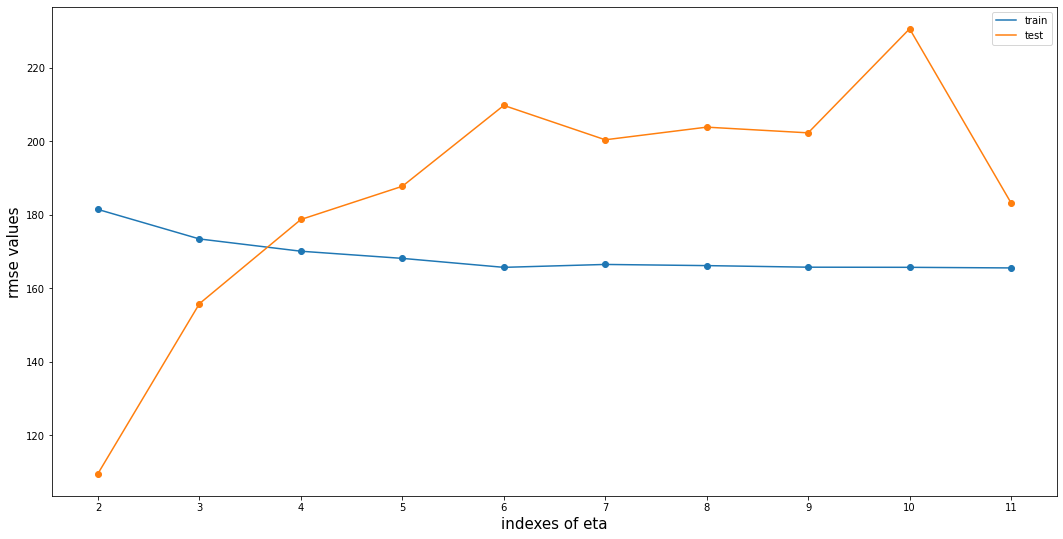

In [655]:
# through graph:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,9))
plt.scatter(np.arange(2,len(Test)+2),data2["train rmse"])
plt.plot(np.arange(2,len(Test)+2),data2["train rmse"])

plt.scatter(np.arange(2,len(Test)+2),data2["test rmse"])
plt.plot(np.arange(2,len(Test)+2),data2["test rmse"])
plt.xticks(np.arange(2,len(Test)+2))
plt.xlabel("indexes of eta")
plt.ylabel("rmse values")
plt.legend(["train","test"])
plt.show()



In [656]:
len(eta)

10

In [657]:
eta[0]
#0.1

0.1

In [658]:
# tree depth:
Train=[]
Test=[]
for i in range(1,21):
    model=XGBRegressor(n_estimators=150,max_depth=i,eta=0.1,subsample=0.8,colsample_bytree=0.3,random_state=9)
    model.fit(x_train,y_train)
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    Train.append(sqrt(mse(y_train,y_train_pred)))
    Test.append(sqrt(mse(y_test,y_test_pred)))



In [659]:
data3=pd.DataFrame({"train rmse":Train,"test rmse":Test})
data3

,train rmse,test rmse
0,199.174364,137.379436
1,188.570922,107.419935
2,181.422503,109.570842
3,178.749626,110.564420
4,178.048087,109.820581
5,177.787196,109.749756
6,177.787196,109.749756
7,177.787196,109.749756
8,177.787196,109.749756
9,177.787196,109.749756


In [660]:
len(Test)

20

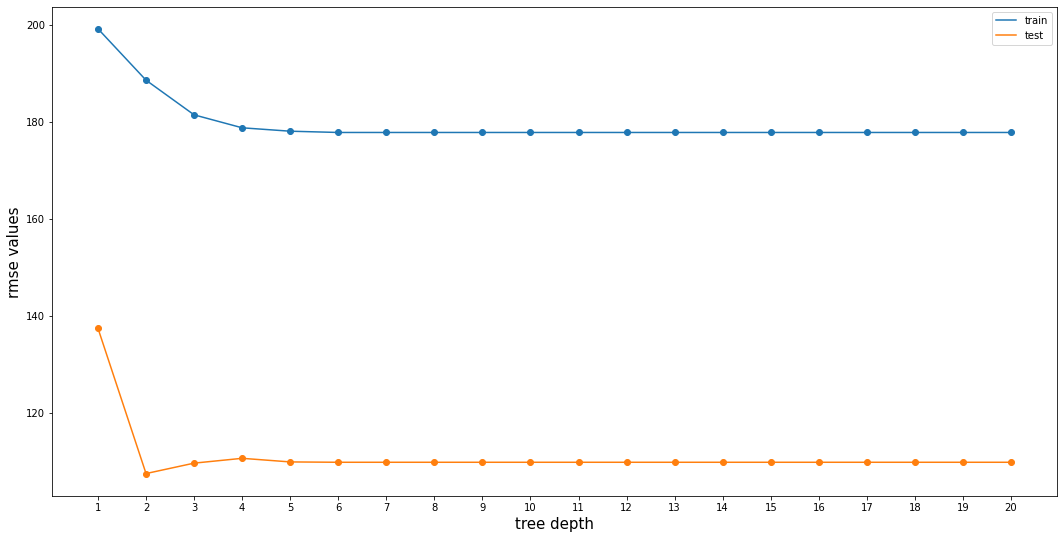

In [661]:
# through graph:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,9))
plt.scatter(np.arange(1,len(Test)+1),data3["train rmse"])
plt.plot(np.arange(1,len(Test)+1),data3["train rmse"])

plt.scatter(np.arange(1,len(Test)+1),data3["test rmse"])
plt.plot(np.arange(1,len(Test)+1),data3["test rmse"])
plt.xticks(np.arange(1,len(Test)+1))
plt.xlabel("tree depth")
plt.ylabel("rmse values")
plt.legend(["train","test"])
plt.show()

In [662]:
#depth is 6

### building model after tuning the hyperparameters

In [663]:
model=XGBRegressor(n_estimators=150,max_depth=6,eta=0.1,subsample=0.8,colsample_bytree=0.3,random_state=9)

In [664]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=9, reg_alpha=0, ...)

In [665]:
train_pred=model.predict(x_train)
train_pred

array([2589.1147, 2589.1147, 2589.1147, ..., 4238.4253, 4238.4253,
       4238.4253], dtype=float32)

In [666]:
train_rmse=sqrt(mse(y_train,train_pred)).round(3)
train_rmse

177.787

In [715]:
predicted=model.predict(x_test)
predicted=predicted.round(2)
#predicted

In [716]:
forecast=pd.DataFrame({"prediction":predicted})
forecast.head(5)
forecast

,prediction
0,4243.339844
1,4243.339844
2,4243.339844
3,4243.339844
4,4243.339844
...,...
177,4279.100098
178,4279.100098
179,4279.100098
180,4279.100098


In [717]:
# set indexing starting from 2000
forecast = forecast.set_index(x_test.index)
forecast.head(5)

,prediction
2000,4243.339844
2001,4243.339844
2002,4243.339844
2003,4243.339844
2004,4243.339844


In [718]:
xx=pd.DataFrame({"actual price":test["price"],"predicted price":predicted})
print(xx.head(45))

      actual price  predicted price
2000        4232.3      4243.339844
2001        4225.8      4243.339844
2002        4238.9      4243.339844
2003        4242.3      4243.339844
2004        4244.4      4243.339844
2005        4241.7      4243.339844
2006        4197.8      4243.339844
2007        4224.7      4243.339844
2008        4522.6      4281.970215
2009        4238.8      4281.970215
2010        3995.4      4281.970215
2011        4149.0      4281.970215
2012        4310.8      4281.970215
2013        4439.6      4281.970215
2014        4330.3      4281.970215
2015        4201.7      4281.970215
2016        4225.6      4281.970215
2017        4217.8      4281.970215
2018        4330.1      4281.970215
2019        4324.3      4281.970215
2020        4332.6      4281.970215
2021        4368.3      4281.970215
2022        4376.7      4281.970215
2023        4340.7      4281.970215
2024        4341.2      4281.970215
2025        4341.2      4281.970215
2026        4360.4      4281

In [719]:
y_test=test["price"]

In [720]:
y_test=pd.DataFrame({'actual price':y_test})

In [721]:
y_test.head(5)

,actual price
2000,4232.3
2001,4225.8
2002,4238.9
2003,4242.3
2004,4244.4


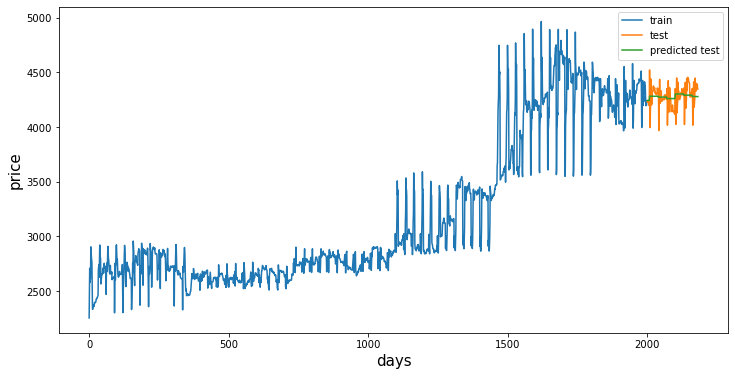

In [722]:
train["price"].plot(legend=True, label="train",figsize=(12,6))
test["price"].plot(legend=True, label="test")
forecast["prediction"].plot(legend=True,label="predicted test")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

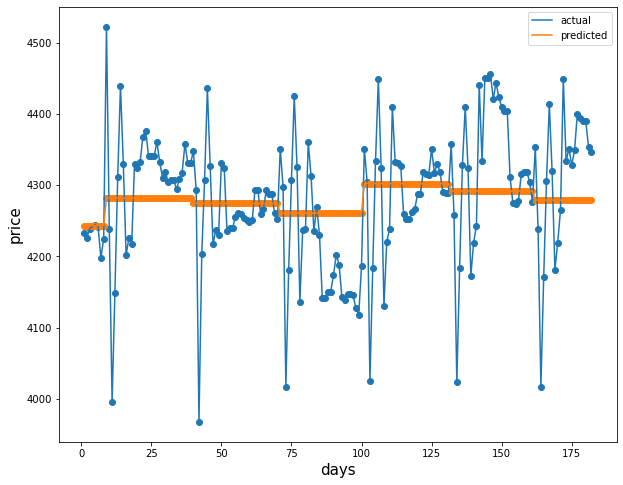

In [723]:
plt.figure(figsize=(10,8))
plt.scatter(np.arange(1,len(y_test)+1),y_test)
plt.plot(np.arange(1,len(y_test)+1),y_test)

plt.scatter(np.arange(1,len(y_test)+1),forecast)
plt.plot(np.arange(1,len(y_test)+1),forecast)
plt.xlabel("days")
plt.ylabel("price")
plt.legend(["actual","predicted"])

In [724]:
mse(y_test,forecast)

8145.75886368075

In [725]:
test_rmse=sqrt(mse(y_test,forecast)).round(3)
test_rmse

90.254

In [726]:
#Evaluation Metric MAPE
def MAPE(org,pred):
    temp = np.abs((org-pred)/org)*100
    return np.mean(temp)

In [727]:
MAPE(test["price"],predicted.round(2))

1.586519067025323

In [728]:
b=pd.DataFrame({"XGBoost":["training","testing"], "rmse":[train_rmse,test_rmse]})
b
 

,XGBoost,rmse
0,training,177.787
1,testing,90.254


In [731]:
# before tuning:
a

,XG_boost,rmse
0,training,165.859
1,testing,178.934


In [732]:
# after tuning:
b

,XGBoost,rmse
0,training,177.787
1,testing,90.254


In [683]:
# notes:
# RMSE of test > RMSE of train => OVER FITTING of the data.
# RMSE of test < RMSE of train => UNDER FITTING of the data.

In [684]:
# notes: it is important to recall that RMSE has the same unit as the dependent variable (DV). It means that there is no absolute good
#    or bad threshold, however you can define it based on your DV. 
#    For a datum which ranges from 0 to 1000, an RMSE of 0.7 is small, but if the range goes from 0 to 1, it is not that 
#    small anymore. However, although the smaller the RMSE, the better, you can make theoretical claims on levels of the RMSE
#    by knowing what is expected from your DV in your field of research. Keep in mind that you can always normalize the RMSE.

# notes: about comparing two models with different datasets by using RMSE, you may do that provided that the DV is the 
# same in both models. Here, the smaller the better but remember that small differences between those RMSE may
# not be relevant or even significant.

## final model

In [685]:
data1.head(5)

,date,year,month,price,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016-01-01,2016,Jan,2252.60,1,0,0,0,0,0,0,0,0,0,0,0
1,2016-01-02,2016,Jan,2454.50,1,0,0,0,0,0,0,0,0,0,0,0
2,2016-01-03,2016,Jan,2708.10,1,0,0,0,0,0,0,0,0,0,0,0
3,2016-01-04,2016,Jan,2577.80,1,0,0,0,0,0,0,0,0,0,0,0
4,2016-01-05,2016,Jan,2597.75,1,0,0,0,0,0,0,0,0,0,0,0


In [686]:
df11=data1.drop(["date","month"],axis=1)

In [687]:
df11.head(5)

,year,price,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016,2252.60,1,0,0,0,0,0,0,0,0,0,0,0
1,2016,2454.50,1,0,0,0,0,0,0,0,0,0,0,0
2,2016,2708.10,1,0,0,0,0,0,0,0,0,0,0,0
3,2016,2577.80,1,0,0,0,0,0,0,0,0,0,0,0
4,2016,2597.75,1,0,0,0,0,0,0,0,0,0,0,0


In [688]:
df11.dtypes

year      object
price    float64
Jan        uint8
Feb        uint8
Mar        uint8
Apr        uint8
May        uint8
Jun        uint8
Jul        uint8
Aug        uint8
Sep        uint8
Oct        uint8
Nov        uint8
Dec        uint8
dtype: object

In [689]:
df11["year"]=df11["year"].astype(int)
x_train.dtypes

year    int32
Jan     uint8
Feb     uint8
Mar     uint8
Apr     uint8
May     uint8
Jun     uint8
Jul     uint8
Aug     uint8
Sep     uint8
Oct     uint8
Nov     uint8
Dec     uint8
dtype: object

In [690]:
x_train=df11.drop("price",axis=1)
x_train.head(5)

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016,1,0,0,0,0,0,0,0,0,0,0,0
1,2016,1,0,0,0,0,0,0,0,0,0,0,0
2,2016,1,0,0,0,0,0,0,0,0,0,0,0
3,2016,1,0,0,0,0,0,0,0,0,0,0,0
4,2016,1,0,0,0,0,0,0,0,0,0,0,0


In [691]:
y_train=df11["price"]
y_train

0       2252.60
1       2454.50
2       2708.10
3       2577.80
4       2597.75
         ...   
2177    4394.40
2178    4389.50
2179    4389.50
2180    4354.10
2181    4346.50
Name: price, Length: 2182, dtype: float64

In [692]:
model=XGBRegressor(n_estimators=150,max_depth=6,eta=0.1,subsample=0.8,colsample_bytree=0.3,random_state=9)

In [693]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=9, reg_alpha=0, ...)

In [694]:
df11.head(5)

,year,price,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016,2252.60,1,0,0,0,0,0,0,0,0,0,0,0
1,2016,2454.50,1,0,0,0,0,0,0,0,0,0,0,0
2,2016,2708.10,1,0,0,0,0,0,0,0,0,0,0,0
3,2016,2577.80,1,0,0,0,0,0,0,0,0,0,0,0
4,2016,2597.75,1,0,0,0,0,0,0,0,0,0,0,0


In [695]:
df.tail(1)

,date,price,year,month,price_sqrt,price_log
2181,2021-12-21,4346.5,2021,Dec,65.927991,8.377126


In [696]:
year=[2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,
      2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,
      2022,2022,2022,2022,2022,2022,2022,2022,2022,2022]

In [697]:
Jan=[0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

Feb=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Mar=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Apr=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

May=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Jun=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Jul=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Aug=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Sep=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Oct=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Nov=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Dec=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [698]:
future=pd.DataFrame({"year":year,"Jan":Jan,"Feb":Feb,"Mar":Mar,"Apr":Apr,"May":May,"Jun":Jun,"Jul":Jul,"Aug":Aug,"Sep":Sep,
                     "Oct":Oct,"Nov":Nov,"Dec":Dec})

In [699]:
# forecasting:
forecast=model.predict(future)
forecast

array([4252.2983, 4252.2983, 4252.2983, 4252.2983, 4252.2983, 4252.2983,
       4252.2983, 4252.2983, 4252.2983, 4252.2983, 4181.334 , 4181.334 ,
       4181.334 , 4181.334 , 4181.334 , 4181.334 , 4181.334 , 4181.334 ,
       4181.334 , 4181.334 , 4181.334 , 4181.334 , 4181.334 , 4181.334 ,
       4181.334 , 4181.334 , 4181.334 , 4181.334 , 4181.334 , 4181.334 ],
      dtype=float32)

In [700]:
forecast=pd.DataFrame(forecast)
forecast.head(2)

,0
0,4252.29834
1,4252.29834


In [701]:
forecast.rename(columns={0:"price"},inplace=True)
forecast.head(1)

,price
0,4252.29834


In [702]:
2182+30

2212

In [703]:
# set indexing starting from 2182
index=list(range(2182,2212))
#index


In [704]:
forecast = forecast.set_index([index])
forecast.head(5)

,price
2182,4252.29834
2183,4252.29834
2184,4252.29834
2185,4252.29834
2186,4252.29834


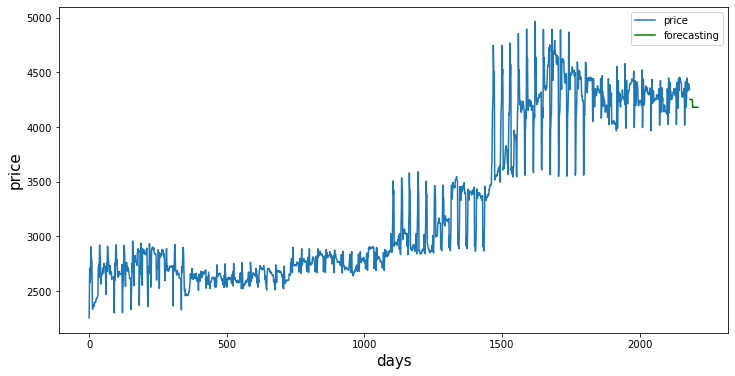

In [705]:
import matplotlib.pyplot as plt
df11["price"].plot(legend=True, label="price",figsize=(12,6))
forecast["price"].plot(legend=True, label="forecasting",c="g")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

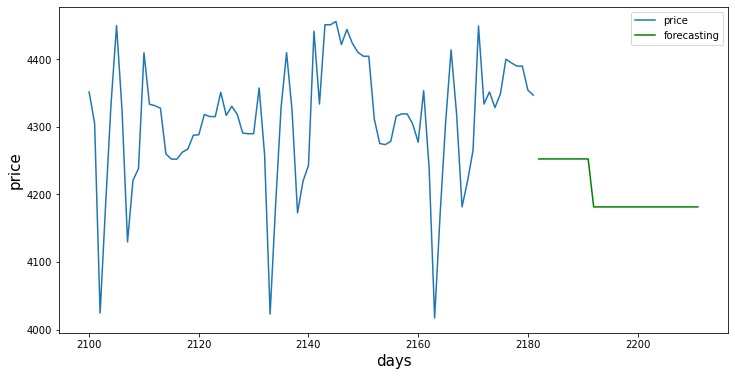

In [706]:
import matplotlib.pyplot as plt
df11["price"][2100:].plot(legend=True, label="price",figsize=(12,6))
forecast["price"].plot(legend=True, label="forecasting",c="g")
#plt.xticks(np.arange(2000,2187))
plt.xlabel("days")
plt.ylabel("price")
plt.show()